In [1]:
import sys
sys.path.insert(0, '../asyncroscopy/')
from clients.tem_client import TEMClient
from utils import start_server
import matplotlib.pyplot as plt

In [6]:
# connecting the TEMClient to the central (async) server
tem = TEMClient.connect(host='localhost',port=9000)

Connecting to central server localhost:9000...
Connected to central server.


In [ ]:
tem.get_status()

### Getting an image takes 5 seconds:

[client] sending: AS_get_scanned_image HAADF 512 1e-05
[client] sent: AS_get_scanned_image HAADF 512 1e-05


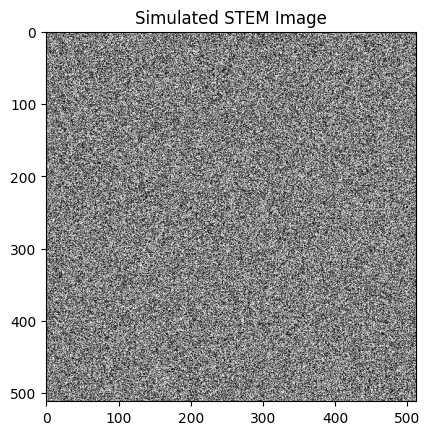

In [5]:
# works with images upt to size = 300 - working on it
img = tem.get_scanned_image(scanning_detector='HAADF', size=512, dwell_time=10e-6)

plt.imshow(img, cmap="gray")
plt.title("Simulated STEM Image")
plt.show()


### Getting a spectrum takes 3 seconds:

[client] sending: Gatan_get_spectrum 512
[client] sent: Gatan_get_spectrum 512


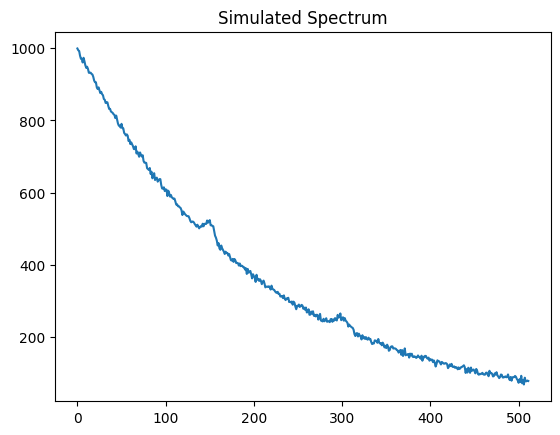

In [6]:
spec = tem.get_spectrum(512)

plt.plot(spec)
plt.title("Simulated Spectrum")
plt.show()

### Why not both at once?

[client] sending: AS_get_scanned_image Haadf 512 1e-05
[client] sending: Gatan_get_spectrum 512
[client] sent: AS_get_scanned_image Haadf 512 1e-05
[client] sent: Gatan_get_spectrum 512


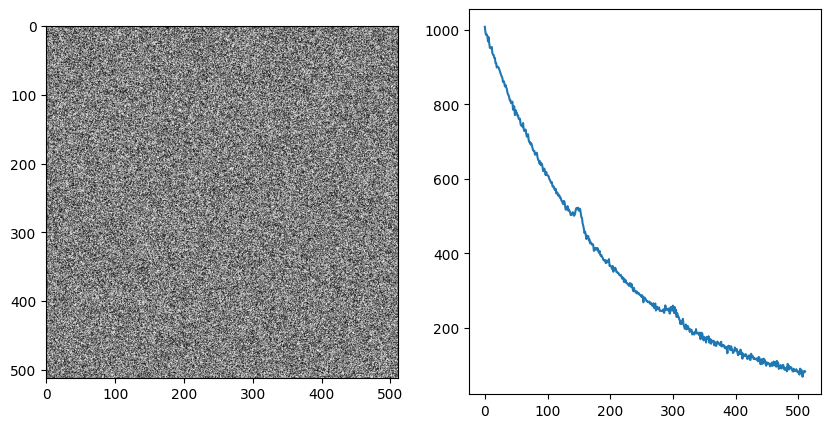

In [7]:
image, spec = tem.get_image_and_spectrum(image_size = 512, image_dwell_time = 10e-6,
                                spectrum_size = 512)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, cmap="gray")

ax[1].plot(spec)

